In [58]:
# import os
import pandas as pd
import numpy as np

from dataset_process import dataset_to_df, search_df
import matplotlib as mpl
import matplotlib.pyplot as plt
import pywt
import cv2

In [6]:
path = '../../data/CIFAK'
relative_paths = ["/train/REAL", "/train/FAKE", "/test/REAL", "/test/FAKE"]
paths_classes = ["REAL", "FAKE", "REAL", "FAKE"]

# for r_path in relative_paths:
#     remove_fname_space(path + r_path)

df_all, df_train, df_val, df_test, classes_stats = dataset_to_df(
    path, relative_paths, paths_classes, 0.8, 0.19, 0.01)

In [7]:
path2 = '../../data/meso_data'
relative_paths2= ["/Real", "/DeepFake"]
paths_classes2=['REAL',"FAKE"]


df_all2, df_train2, df_val2, df_test2, classes_stats2 = dataset_to_df(
    path2, relative_paths2, paths_classes2, 0.8, 0.19, 0.01)

In [8]:
search_df(df_all2,"82_678")

2937

System signal processing
localization of features
1) In fourier series , sin wave is the basis function (i.e. it forms a good waveform to represent wide varieties of signals)
2) Problem of the sin wave is that lasts forever (from $-\infty$ to $+\infty$) 
3) wavelets are small waves ( waves that don't last forever)
4) The uncertainty in the time and frequency domain
5) Analysis vs Representation
6) har multi-resolution analysis
7) Fourier analysis takes non-smooth signal and analyze it to a some of smooth signals (sin waves) , haar discussed the opposite, by taking a smooth signal and compose it from some of non smooth signals ( which is used when audio is digitized to be stored and transmitted) , this is called haar multi-resolution analysis.
8) multi-rate digital processing
9) resolution is the ability to identify specific components
10) Going down to lower frequencies (signal is slower changing) we need to focus on having better frequency resolution rather than time resolution , hence we can have a slower sampling rate and a larger time intervals.
On the opposite side, when we go up to higher frequencies (signal becomes very fast changing) we need better time resolution ( i.e we need to narrow down on the time axis to know at which time interval the frequency change happens , hence we need to sample at higher frequency) , to conclude we will use different sampling rate in the same system for the same signal.
11) Filter Banks : system of filters which have the a common input or a common output, hence we have an analysis filter banks and a synthesis filter bank.

Piecewise Constant representation of the image, one constant for each piece(pixel)
The smaller the pixel area , the higher the resolution

Mother wavelet $\Psi(t)$ <br>
Daughter wavelets $\Psi_{a, b}$<br><br>
where $\Psi_{a, b}=\Psi\left(\frac{t-b}{a}\right)$<br><br>
and a: is a frequency scale $\Rightarrow$ the higher the a, the lower the frequency<br>
and b : is a time shift, to the right if b is (+ve) or to the left of b is (-ve) <br>
to measure the similarity (Amplitude) $T(a, b)$ between the wavelet function and the original signal function $y(t)$ we convolute both functions <br><br>
$T(a, b)=\int_{-\infty}^{\infty} y(t) \cdot \Psi_{a, b}(t) d t$ <br><br>
$T(a, b)$ is also referred to as the Continuous Wavelet Transform (CWT) and the result of this transform is called wavelet coefficients

$$ 
\begin{aligned}
& \int_{-\infty}^{\infty} \Psi(t) d t=0 \\
\end{aligned}
$$
This means that the wavelet function has an average of zero
$$
\begin{aligned}
& \int_{-\infty}^{\infty}|\Psi(t)|^2 d t<\infty \\
& \psi(t)=k_0 \cdot \cos (\omega t) \cdot e^{-\frac{t^2}{2}}
\end{aligned}
$$
$$
\begin{aligned}
& \vec{a}=\left[a_1, a_2, \ldots, a_N\right] \\
& \vec{b}=\left[b_1, b_2, \ldots, b_N\right] \\
& \vec{a} \cdot \vec{b}=a_1 b_1+a_2 b_2+\ldots+a_N b_N \\
& \langle f, g\rangle=\int_{-\infty}^{\infty} f(t) g(t) d t \\
& T(a, b)=\int_{-\infty}^{\infty} y(t) \cdot \Psi_{a, b}(t) d t \\
& \Psi_{a, b}=\Psi\left(\frac{t-b}{a}\right)
\end{aligned}
$$

In [48]:
print(pywt.families())
print(pywt.wavelist('haar'))

['haar', 'db', 'sym', 'coif', 'bior', 'rbio', 'dmey', 'gaus', 'mexh', 'morl', 'cgau', 'shan', 'fbsp', 'cmor']
['haar']


In [ ]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel(
                "Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

In [146]:
img = plt.imread(df_all2.iloc[2937, 0])
img_normalized = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
img[:,:,0].shape

(352, 352)

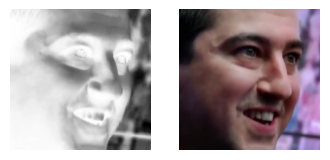

In [149]:
figure = plt.figure(figsize=(4, 2))

mpl.style.use('seaborn-v0_8')
color_palettes = ['gray','viridis','inferno','magma','plasma','jet']
cm = plt.get_cmap(color_palettes[1])
alpha=1

ax1 = plt.subplot(121)
ax1.imshow(img[:,:,2])
ax1.grid(False)
ax1.axis("off")

ax2 = plt.subplot(122)
ax2.imshow(img_normalized)
ax2.grid(False)
ax2.axis("off");

In [135]:
level = 2
w2 = 'db1'
img_wp = img_normalized[:, :, 2]
wp = pywt.WaveletPacket2D(data=img_wp, wavelet=w2, mode='symmetric')
wp['a'].data

print(wp.data.shape)
print(wp.level)
print(wp.maxlevel)

path1 = ""
path2 = ""
paths = [node.path for node in wp.get_level(level)]
for i, path in enumerate(paths):
    if (i+1) % level**2 == 0:
        print(path)
        if i == 0:
            path11 = path
        elif i==level**2-1:
            path12=path
        elif i==level**2-1:
            path12=path
        if i == len(paths)-1:
            path2 = path
    else:
        print(path, end=' ') # don't move to new line , and next print 

(352, 352)
0
8
aa ah av ad
ha hh hv hd
va vh vv vd
da dh dv dd


In [140]:
print("1", end=' ')
print("2", end=' ')
print("2", end=' ')

1 2 

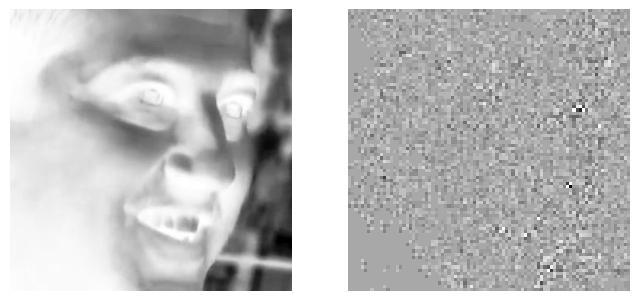

In [136]:
img_sample1 = np.array(wp[path1].data)
img_sample2 = np.array(wp[path2].data)

ax1 = plt.subplot(121)
ax1.imshow(img_sample1)
ax1.grid(False)
ax1.axis("off")
ax1 = plt.subplot(122)
ax1.imshow(img_sample2)
ax1.grid(False)
ax1.axis("off")